1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

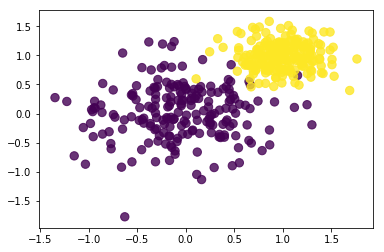

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

/var/folders/nv/28ksfhj10wz9h413w7pr82sc0000gn/T/ipykernel_58833/2155680951.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


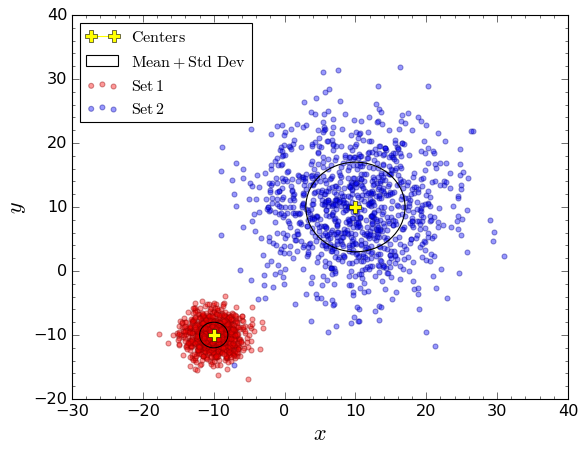

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')


def random2D_2distr(nb_of_elements, mean1, sigma1, mean2, sigma2):
    normal1 = np.random.normal(loc = mean1, scale = sigma1, size = (nb_of_elements, nb_of_elements))
    normal2 = np.random.normal(loc = mean2, scale = sigma2, size = (nb_of_elements, nb_of_elements))
    return normal1, normal2


n = 1000
mean1, sigma1 = -10, 2
mean2, sigma2 = 10, 7

normal1, normal2 = random2D_2distr(n, mean1, sigma1, mean2, sigma2)
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')

ax.scatter(normal1[0, :], normal1[1, :], marker = 'o', color = 'red', edgecolor = "darkred", alpha = 0.4, label = "${\\rm Set\, 1}$")
ax.scatter(normal2[0, :], normal2[1, :], marker = 'o', color = 'blue', edgecolor = "darkblue", alpha = 0.4, label = "${\\rm Set\, 2}$")
ax.set_xlabel("$x$", size = 20); ax.set_ylabel("$y$", size = 20)

ax.plot(mean1, mean1, marker = "P", color = "yellow", markersize = 10, label = "${\\rm Centers}$")
ax.plot(mean2, mean2, marker = "P", color = "yellow", markersize = 10)
CI_normal1 = plt.Circle((mean1, mean1), sigma1, color='black', fill = False, label = "${\\rm Mean} + {\\rm Std\ Dev}$")
CI_normal2 = plt.Circle((mean2, mean2), sigma2, color='black', fill = False)

ax.add_patch(CI_normal1)
ax.add_patch(CI_normal2)

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)
ax.legend(loc = "best")
fig.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


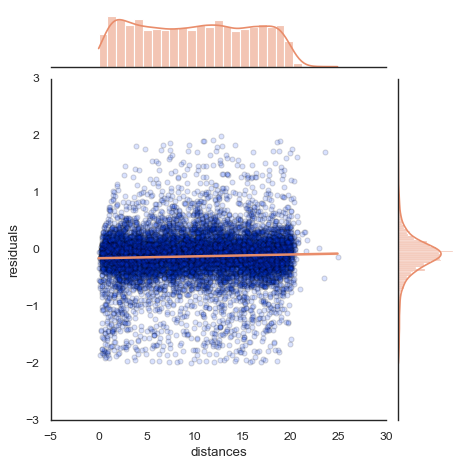

In [5]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(context = "notebook", style = "white", palette = "bright")
sns.set_palette("flare")
# inspection
fileName = "data/residuals_261.pkl"

infile = open(fileName, 'rb')
data = pickle.load(infile)
infile.close()

pickle_dict = dict(data.item()) # passing the pickle to a dictionary
pickle_dict["residuals"]

# now we convert to pandas do dataframe
df = pd.DataFrame(pickle_dict)

# keep the values where |residuals| < 2
df_cleaned = df.loc[abs(df["residuals"]) < 2]
print(df_cleaned)

g = sns.jointplot(data = df_cleaned, x = "distances", y = "residuals", kind = "reg", scatter = False)
g.ax_joint.scatter(data = df_cleaned, x = "distances", y = "residuals", marker = "o", alpha = 0.15, edgecolors = "black")



[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5]
bins
1    -0.247253
2    -0.134662
3    -0.175746
4    -0.165248
5    -0.127895
6    -0.138727
7    -0.104401
8    -0.078962
9    -0.102544
10   -0.090814
11   -0.039365
12   -0.099861
13   -0.084838
14   -0.135857
15   -0.139114
16   -0.135869
17   -0.140509
18   -0.157957
19   -0.126805
20   -0.054129
21    0.045369
22    0.051111
24    0.412857
25   -0.128571
Name: residuals, dtype: float64
24


/var/folders/nv/28ksfhj10wz9h413w7pr82sc0000gn/T/ipykernel_58833/2064950368.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["bins"] = np.digitize(df_cleaned["distances"], bins = binsx)


Text(0, 0.5, '${\\rm residuals}$')

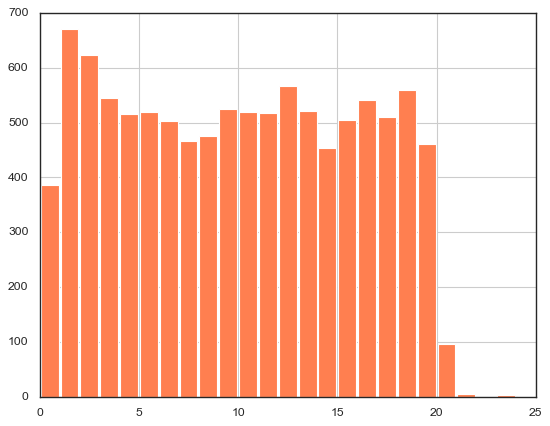

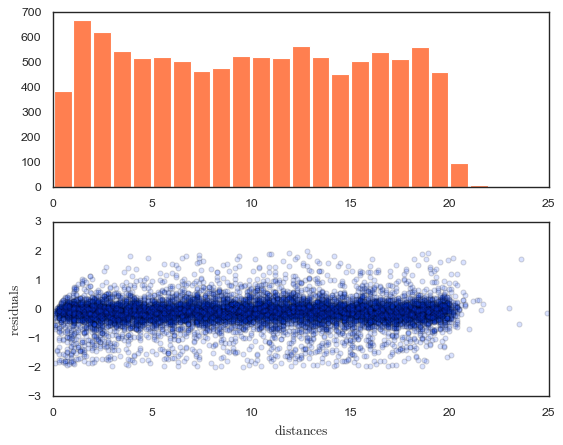

In [6]:
### 2.6 ###
binsx = np.linspace(0, 25, 26)
#df_cleaned["distances"].hist(bins = binsx, align = "mid", color = "coral", rwidth = 0.9)
df_cleaned["distances"].hist(bins = binsx, align = "mid", color = "coral", rwidth = 0.9)



### 2.7 ###
x = (binsx[1:]+binsx[:-1])/2
print(x)

df_cleaned["bins"] = np.digitize(df_cleaned["distances"], bins = binsx)
y = df_cleaned.groupby("bins")["residuals"].mean()
print(y)
err_y = df_cleaned.groupby("bins")["residuals"].std()
print(len(err_y))

fig, ax = plt.subplots(2,1); fig.patch.set_facecolor("xkcd:white")

ax[0].hist(df_cleaned["distances"], bins = binsx, align = "mid", color = "coral", rwidth = 0.9)
ax[1].scatter(data = df_cleaned, x = "distances", y = "residuals", marker = "o", alpha = 0.15, edgecolors = "black")
ax[1].set_xlim(0, 25); ax[1].set_xlabel("${\\rm distances}$")
ax[1].set_ylabel("${\\rm residuals}$")

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Text(0.5, 0, '$x$')

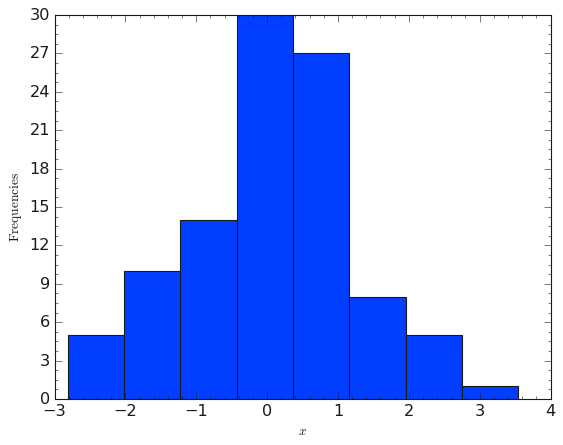

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use("classic")
fig, ax = plt.subplots()
fig.patch.set_facecolor("xkcd:white")

mean = 0.
stdDev = 1.
n = 100

nrnd = np.random.normal(loc = mean, scale = stdDev, size=(n,)) # generate 100 random numbers using a Gaussian pdf

# implementing an appropiate number of bins with Sturge's rule
bins = int(np.ceil(np.log2(len(nrnd))) + 1)

ax.hist(nrnd, bins = bins)

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)

ax.set_ylabel("${\\rm Frequencies}$")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ya = ax.get_yaxis()
ya.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("$x$")
